In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle 

In [2]:
import os
import cv2
import numpy as np


from google.colab import drive
drive.mount('/content/drive')


path_S = '/content/drive/My Drive/NN/santa/'


path_NS= '/content/drive/My Drive/NN/not-a-santa/'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


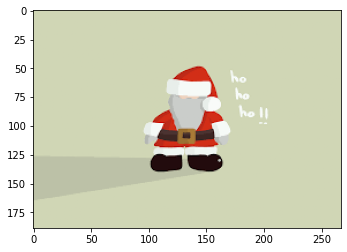

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_filenames = os.listdir(path_S)

img_path = os.path.join(path_S, image_filenames[1])
img = mpimg.imread(img_path)

plt.imshow(img)
plt.show()

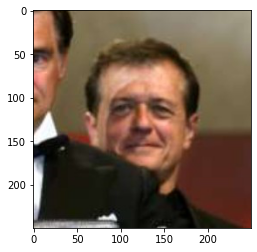

In [4]:
image_filenames = os.listdir(path_NS)

img_path = os.path.join(path_NS, image_filenames[1])
img = mpimg.imread(img_path)

plt.imshow(img)
plt.show()

In [5]:

images_S = []

for filename in os.listdir(path_S):
    img = cv2.imread(os.path.join(path_S, filename))
    img = cv2.resize(img, (224, 224))
    images_S.append(np.array(img))


images_S = np.array(images_S)
type(images_S)


numpy.ndarray

In [6]:
images_NS = []

for filename in os.listdir(path_NS):
    img = cv2.imread(os.path.join(path_NS, filename))
    img = cv2.resize(img, (224, 224))
    images_NS.append(np.array(img))


images_NS = np.array(images_NS)

type(images_NS)

numpy.ndarray

In [7]:

labels_S = np.ones(images_S.shape[0], dtype=int)


labels_NS = np.zeros(images_NS.shape[0], dtype=int)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = np.concatenate((images_S, images_NS), axis=0)
y = np.concatenate((labels_S, labels_NS), axis=0)

X = x/255.0
Y = y/255.0

In [9]:
unique_values = np.unique(Y)
print(Y)

[0.00392157 0.00392157 0.00392157 ... 0.         0.         0.        ]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
model.save('Scenario_1.h5')

Epoch 1/5
31/31 [==============================] - 14s 109ms/step - loss: 0.0450 - accuracy: 0.5061 - val_loss: 0.0167 - val_accuracy: 0.4756
Epoch 2/5
31/31 [==============================] - 2s 64ms/step - loss: 0.0146 - accuracy: 0.5061 - val_loss: 0.0146 - val_accuracy: 0.4756
Epoch 3/5
31/31 [==============================] - 2s 63ms/step - loss: 0.0138 - accuracy: 0.5061 - val_loss: 0.0144 - val_accuracy: 0.4756
Epoch 4/5
31/31 [==============================] - 2s 62ms/step - loss: 0.0135 - accuracy: 0.5061 - val_loss: 0.0142 - val_accuracy: 0.4756
Epoch 5/5
31/31 [==============================] - 2s 58ms/step - loss: 0.0133 - accuracy: 0.5061 - val_loss: 0.0141 - val_accuracy: 0.4756


**Scenario_2**

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

model.save('Scenario_2.h5')

Epoch 1/3
16/16 [==============================] - 13s 485ms/step - loss: 0.1102 - accuracy: 0.5061 - val_loss: 0.0318 - val_accuracy: 0.4756
Epoch 2/3
16/16 [==============================] - 3s 211ms/step - loss: 0.0195 - accuracy: 0.5061 - val_loss: 0.0165 - val_accuracy: 0.4756
Epoch 3/3
16/16 [==============================] - 4s 225ms/step - loss: 0.0145 - accuracy: 0.5061 - val_loss: 0.0149 - val_accuracy: 0.4756


**Scenario_3**

In [ ]:
#Scenario_3
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

model.save('Scenario_3.h5')

Epoch 1/3
16/16 [==============================] - 9s 253ms/step - loss: 0.0691 - accuracy: 0.4766 - val_loss: 0.0183 - val_accuracy: 0.4756
Epoch 2/3
16/16 [==============================] - 2s 154ms/step - loss: 0.0155 - accuracy: 0.5061 - val_loss: 0.0154 - val_accuracy: 0.4756
Epoch 3/3
16/16 [==============================] - 2s 153ms/step - loss: 0.0140 - accuracy: 0.5061 - val_loss: 0.0145 - val_accuracy: 0.4756


In [ ]:
#Scenario_4
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

model.save('Scenario_4.h5')

Epoch 1/5
8/8 [==============================] - 10s 670ms/step - loss: 0.1460 - accuracy: 0.4837 - val_loss: 0.0222 - val_accuracy: 0.4756
Epoch 2/5
8/8 [==============================] - 2s 207ms/step - loss: 0.0231 - accuracy: 0.5061 - val_loss: 0.0231 - val_accuracy: 0.4756
Epoch 3/5
8/8 [==============================] - 2s 204ms/step - loss: 0.0191 - accuracy: 0.5061 - val_loss: 0.0191 - val_accuracy: 0.4756
Epoch 4/5
8/8 [==============================] - 2s 204ms/step - loss: 0.0164 - accuracy: 0.5061 - val_loss: 0.0162 - val_accuracy: 0.4756
Epoch 5/5
8/8 [==============================] - 2s 222ms/step - loss: 0.0149 - accuracy: 0.5061 - val_loss: 0.0157 - val_accuracy: 0.4756


Scenario_5

In [ ]:
#Scenario_5
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_5.h5')

Epoch 1/5
31/31 [==============================] - 5s 86ms/step - loss: 0.0647 - accuracy: 0.4949 - val_loss: 0.0226 - val_accuracy: 0.4756
Epoch 2/5
31/31 [==============================] - 2s 65ms/step - loss: 0.0187 - accuracy: 0.5061 - val_loss: 0.0215 - val_accuracy: 0.4756
Epoch 3/5
31/31 [==============================] - 2s 61ms/step - loss: 0.0184 - accuracy: 0.5061 - val_loss: 0.0212 - val_accuracy: 0.4756
Epoch 4/5
31/31 [==============================] - 2s 61ms/step - loss: 0.0183 - accuracy: 0.5061 - val_loss: 0.0210 - val_accuracy: 0.4756
Epoch 5/5
31/31 [==============================] - 2s 65ms/step - loss: 0.0182 - accuracy: 0.5061 - val_loss: 0.0208 - val_accuracy: 0.4756


Scenario_6

In [ ]:
#Scenario_6
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_6.h5')

Epoch 1/5
31/31 [==============================] - 6s 122ms/step - loss: 0.0498 - accuracy: 0.5061 - val_loss: 0.0219 - val_accuracy: 0.4756
Epoch 2/5
31/31 [==============================] - 2s 66ms/step - loss: 0.0185 - accuracy: 0.5061 - val_loss: 0.0215 - val_accuracy: 0.4756
Epoch 3/5
31/31 [==============================] - 2s 67ms/step - loss: 0.0184 - accuracy: 0.5061 - val_loss: 0.0213 - val_accuracy: 0.4756
Epoch 4/5
31/31 [==============================] - 2s 72ms/step - loss: 0.0182 - accuracy: 0.5061 - val_loss: 0.0211 - val_accuracy: 0.4756
Epoch 5/5
31/31 [==============================] - 2s 77ms/step - loss: 0.0181 - accuracy: 0.5061 - val_loss: 0.0209 - val_accuracy: 0.4756


Scenario_7

In [ ]:
#Scenario_7
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_7.h5')

Epoch 1/5
31/31 [==============================] - 3s 83ms/step - loss: 0.0711 - accuracy: 0.4888 - val_loss: 0.0216 - val_accuracy: 0.4756
Epoch 2/5
31/31 [==============================] - 2s 72ms/step - loss: 0.0183 - accuracy: 0.5061 - val_loss: 0.0211 - val_accuracy: 0.4756
Epoch 3/5
31/31 [==============================] - 2s 71ms/step - loss: 0.0181 - accuracy: 0.5061 - val_loss: 0.0209 - val_accuracy: 0.4756
Epoch 4/5
31/31 [==============================] - 2s 72ms/step - loss: 0.0181 - accuracy: 0.5061 - val_loss: 0.0207 - val_accuracy: 0.4756
Epoch 5/5
31/31 [==============================] - 2s 75ms/step - loss: 0.0180 - accuracy: 0.5061 - val_loss: 0.0206 - val_accuracy: 0.4756


Scenario_8

In [ ]:
#Scenario_8
from keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_8.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
31/31 [==============================] - 3s 85ms/step - loss: 0.3173 - accuracy: 0.5041 - val_loss: 0.1067 - val_accuracy: 0.4756
Epoch 2/5
31/31 [==============================] - 2s 71ms/step - loss: 0.0615 - accuracy: 0.5061 - val_loss: 0.0428 - val_accuracy: 0.4756
Epoch 3/5
31/31 [==============================] - 2s 66ms/step - loss: 0.0315 - accuracy: 0.5061 - val_loss: 0.0305 - val_accuracy: 0.4756
Epoch 4/5
31/31 [==============================] - 2s 74ms/step - loss: 0.0243 - accuracy: 0.5061 - val_loss: 0.0263 - val_accuracy: 0.4756
Epoch 5/5
31/31 [==============================] - 2s 70ms/step - loss: 0.0218 - accuracy: 0.5061 - val_loss: 0.0244 - val_accuracy: 0.4756


Scenario_9

In [ ]:
#Scenario_9
from keras.optimizers import Adam
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.01)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_9.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
31/31 [==============================] - 3s 83ms/step - loss: 1.5518 - accuracy: 0.4776 - val_loss: 0.0159 - val_accuracy: 0.4756
Epoch 2/5
31/31 [==============================] - 2s 67ms/step - loss: 0.0172 - accuracy: 0.5061 - val_loss: 0.0153 - val_accuracy: 0.4756
Epoch 3/5
31/31 [==============================] - 2s 70ms/step - loss: 0.0141 - accuracy: 0.5061 - val_loss: 0.0147 - val_accuracy: 0.4756
Epoch 4/5
31/31 [==============================] - 2s 70ms/step - loss: 0.0140 - accuracy: 0.5061 - val_loss: 0.0148 - val_accuracy: 0.4756
Epoch 5/5
31/31 [==============================] - 2s 70ms/step - loss: 0.0140 - accuracy: 0.5061 - val_loss: 0.0147 - val_accuracy: 0.4756


Scenario_10

In [ ]:
#Scenario_10
from keras.optimizers import Adam
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.1)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_10.h5')

Epoch 1/5
31/31 [==============================] - 4s 82ms/step - loss: 67991.6719 - accuracy: 0.4024 - val_loss: 0.9290 - val_accuracy: 0.4756
Epoch 2/5
31/31 [==============================] - 2s 66ms/step - loss: 0.6408 - accuracy: 0.5061 - val_loss: 0.2694 - val_accuracy: 0.4756
Epoch 3/5
31/31 [==============================] - 2s 70ms/step - loss: 0.0511 - accuracy: 0.5061 - val_loss: 0.0162 - val_accuracy: 0.4756
Epoch 4/5
31/31 [==============================] - 2s 67ms/step - loss: 0.0143 - accuracy: 0.5061 - val_loss: 0.0148 - val_accuracy: 0.4756
Epoch 5/5
31/31 [==============================] - 2s 75ms/step - loss: 0.0141 - accuracy: 0.5061 - val_loss: 0.0148 - val_accuracy: 0.4756


Scenario_11

In [ ]:
#scenario_11
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
model = Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.1)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

model.save('Scenario_11.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
16/16 [==============================] - 15s 262ms/step - loss: 86124.6328 - accuracy: 0.2327 - val_loss: 0.2341 - val_accuracy: 0.4756
Epoch 2/5
16/16 [==============================] - 2s 123ms/step - loss: 0.1638 - accuracy: 0.5061 - val_loss: 0.1106 - val_accuracy: 0.4756
Epoch 3/5
16/16 [==============================] - 2s 123ms/step - loss: 0.0905 - accuracy: 0.5061 - val_loss: 0.0732 - val_accuracy: 0.4756
Epoch 4/5
16/16 [==============================] - 2s 132ms/step - loss: 0.0642 - accuracy: 0.5061 - val_loss: 0.0560 - val_accuracy: 0.4756
Epoch 5/5
16/16 [==============================] - 2s 124ms/step - loss: 0.0507 - accuracy: 0.5061 - val_loss: 0.0459 - val_accuracy: 0.4756


Scenario_12

In [ ]:
#Scenario_12
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.045)

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_12.h5')

Epoch 1/5
31/31 [==============================] - 3s 75ms/step - loss: 0.0779 - accuracy: 0.5061 - val_loss: 0.0214 - val_accuracy: 0.4756
Epoch 2/5
31/31 [==============================] - 2s 59ms/step - loss: 0.0183 - accuracy: 0.5061 - val_loss: 0.0203 - val_accuracy: 0.4756
Epoch 3/5
31/31 [==============================] - 2s 60ms/step - loss: 0.0179 - accuracy: 0.5061 - val_loss: 0.0200 - val_accuracy: 0.4756
Epoch 4/5
31/31 [==============================] - 2s 60ms/step - loss: 0.0178 - accuracy: 0.5061 - val_loss: 0.0199 - val_accuracy: 0.4756
Epoch 5/5
31/31 [==============================] - 2s 68ms/step - loss: 0.0178 - accuracy: 0.5061 - val_loss: 0.0197 - val_accuracy: 0.4756


Scenario_13

In [ ]:
#Scenario_13
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import RMSprop

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

opt = RMSprop(lr=0.01)

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_13.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
31/31 [==============================] - 13s 114ms/step - loss: 0.0776 - accuracy: 0.4929 - val_loss: 0.0219 - val_accuracy: 0.4756
Epoch 2/5
31/31 [==============================] - 2s 64ms/step - loss: 0.0183 - accuracy: 0.5061 - val_loss: 0.0206 - val_accuracy: 0.4756
Epoch 3/5
31/31 [==============================] - 2s 58ms/step - loss: 0.0179 - accuracy: 0.5061 - val_loss: 0.0203 - val_accuracy: 0.4756
Epoch 4/5
31/31 [==============================] - 2s 57ms/step - loss: 0.0178 - accuracy: 0.5061 - val_loss: 0.0202 - val_accuracy: 0.4756
Epoch 5/5
31/31 [==============================] - 2s 58ms/step - loss: 0.0178 - accuracy: 0.5061 - val_loss: 0.0200 - val_accuracy: 0.4756


Scenario_14

In [ ]:
#Scenario_14
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.045)

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model.save('Scenario_14.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
16/16 [==============================] - 5s 166ms/step - loss: 0.1119 - accuracy: 0.4848 - val_loss: 0.0266 - val_accuracy: 0.4756
Epoch 2/10
16/16 [==============================] - 2s 101ms/step - loss: 0.0205 - accuracy: 0.5061 - val_loss: 0.0221 - val_accuracy: 0.4756
Epoch 3/10
16/16 [==============================] - 2s 102ms/step - loss: 0.0187 - accuracy: 0.5061 - val_loss: 0.0214 - val_accuracy: 0.4756
Epoch 4/10
16/16 [==============================] - 2s 112ms/step - loss: 0.0184 - accuracy: 0.5061 - val_loss: 0.0211 - val_accuracy: 0.4756
Epoch 5/10
16/16 [==============================] - 2s 102ms/step - loss: 0.0183 - accuracy: 0.5061 - val_loss: 0.0209 - val_accuracy: 0.4756
Epoch 6/10
16/16 [==============================] - 2s 106ms/step - loss: 0.0182 - accuracy: 0.5061 - val_loss: 0.0208 - val_accuracy: 0.4756
Epoch 7/10
16/16 [==============================] - 2s 116ms/step - loss: 0.0182 - accuracy: 0.5061 - val_loss: 0.0207 - val_accuracy: 0.4756
Epoch 

Scenario_15

In [ ]:
#Scenario_15
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit_generator(train_generator, epochs=10, validation_data=test_generator)
model.save('Scenario_15.h5')

<ipython-input-17-8b53a01fbc01>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=10, validation_data=test_generator)


Epoch 1/10
31/31 [==============================] - 14s 367ms/step - loss: 0.0743 - accuracy: 0.5061 - val_loss: 0.0164 - val_accuracy: 0.4756
Epoch 2/10
31/31 [==============================] - 11s 367ms/step - loss: 0.0147 - accuracy: 0.5061 - val_loss: 0.0148 - val_accuracy: 0.4756
Epoch 3/10
31/31 [==============================] - 11s 362ms/step - loss: 0.0141 - accuracy: 0.5061 - val_loss: 0.0148 - val_accuracy: 0.4756
Epoch 4/10
31/31 [==============================] - 11s 353ms/step - loss: 0.0141 - accuracy: 0.5061 - val_loss: 0.0148 - val_accuracy: 0.4756
Epoch 5/10
31/31 [==============================] - 10s 318ms/step - loss: 0.0140 - accuracy: 0.5061 - val_loss: 0.0148 - val_accuracy: 0.4756
Epoch 6/10
31/31 [==============================] - 13s 405ms/step - loss: 0.0140 - accuracy: 0.5061 - val_loss: 0.0148 - val_accuracy: 0.4756
Epoch 7/10
31/31 [==============================] - 11s 361ms/step - loss: 0.0140 - accuracy: 0.5061 - val_loss: 0.0148 - val_accuracy: 0.4756

Scenario_16

In [ ]:
#Scenario_16
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.045)

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model.save('Scenario_16.h5')

Epoch 1/10
16/16 [==============================] - 3s 163ms/step - loss: 0.6310 - accuracy: 0.6220 - val_loss: 1.1254 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 2s 111ms/step - loss: 0.6091 - accuracy: 0.6240 - val_loss: 1.1119 - val_accuracy: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 2s 102ms/step - loss: 0.5913 - accuracy: 0.6270 - val_loss: 1.0570 - val_accuracy: 0.0407
Epoch 4/10
16/16 [==============================] - 2s 103ms/step - loss: 0.5711 - accuracy: 0.6484 - val_loss: 0.9385 - val_accuracy: 0.1707
Epoch 5/10
16/16 [==============================] - 2s 103ms/step - loss: 0.5451 - accuracy: 0.7043 - val_loss: 1.0623 - val_accuracy: 0.1951
Epoch 6/10
16/16 [==============================] - 2s 102ms/step - loss: 0.5006 - accuracy: 0.7591 - val_loss: 1.7671 - val_accuracy: 0.0691
Epoch 7/10
16/16 [==============================] - 2s 114ms/step - loss: 0.5116 - accuracy: 0.7591 - val_loss: 1.0059 - val_accuracy: 0.353

Scenario_17

In [13]:
#Scenario_17
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
from keras.optimizers import Adam

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))


opt = Adam(lr=0.01)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model.save('Scenario_17.h5')

Epoch 1/10
16/16 [==============================] - 9s 370ms/step - loss: 147.4085 - accuracy: 0.5742 - val_loss: 0.9197 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 3s 209ms/step - loss: 0.5657 - accuracy: 0.7043 - val_loss: 2.4673 - val_accuracy: 0.3577
Epoch 3/10
16/16 [==============================] - 3s 203ms/step - loss: 0.3319 - accuracy: 0.8760 - val_loss: 2.5621 - val_accuracy: 0.4146
Epoch 4/10
16/16 [==============================] - 3s 207ms/step - loss: 0.2939 - accuracy: 0.8852 - val_loss: 2.6424 - val_accuracy: 0.3943
Epoch 5/10
16/16 [==============================] - 3s 209ms/step - loss: 0.2670 - accuracy: 0.8902 - val_loss: 2.8142 - val_accuracy: 0.4024
Epoch 6/10
16/16 [==============================] - 3s 213ms/step - loss: 0.1985 - accuracy: 0.9228 - val_loss: 3.8164 - val_accuracy: 0.4390
Epoch 7/10
16/16 [==============================] - 3s 206ms/step - loss: 0.1235 - accuracy: 0.9441 - val_loss: 3.7190 - val_accuracy: 0.4553


Scenario_18

In [ ]:
#Scenario_18
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
from keras.optimizers import Adam

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))


opt = Adam(lr=0.01)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model.save('Scenario_18.h5')

Epoch 1/10
16/16 [==============================] - 5s 204ms/step - loss: 46.9685 - accuracy: 0.5569 - val_loss: 1.2768 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 2s 107ms/step - loss: 0.6667 - accuracy: 0.6250 - val_loss: 0.7856 - val_accuracy: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 2s 101ms/step - loss: 0.6679 - accuracy: 0.6250 - val_loss: 1.0550 - val_accuracy: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 2s 101ms/step - loss: 0.6619 - accuracy: 0.6250 - val_loss: 0.9491 - val_accuracy: 0.0000e+00
Epoch 5/10
16/16 [==============================] - 2s 110ms/step - loss: 0.6630 - accuracy: 0.6250 - val_loss: 1.0178 - val_accuracy: 0.0000e+00
Epoch 6/10
16/16 [==============================] - 2s 100ms/step - loss: 0.6672 - accuracy: 0.6250 - val_loss: 0.9810 - val_accuracy: 0.0000e+00
Epoch 7/10
16/16 [==============================] - 2s 101ms/step - loss: 0.6648 - accuracy: 0.6250 - val_loss: 0.9340 - va

Scenario_19

In [ ]:
#Scenario_19
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
from keras.optimizers import Adam

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

model = Sequential()

model.add(Conv2D(64, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))


opt = Adam(lr=0.01)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model.save('Scenario_19.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
16/16 [==============================] - 13s 511ms/step - loss: 1081.8240 - accuracy: 0.5732 - val_loss: 1.1150 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 4s 223ms/step - loss: 0.6801 - accuracy: 0.6199 - val_loss: 0.9214 - val_accuracy: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 3s 211ms/step - loss: 0.6567 - accuracy: 0.6220 - val_loss: 1.2743 - val_accuracy: 0.0122
Epoch 4/10
16/16 [==============================] - 3s 210ms/step - loss: 0.6456 - accuracy: 0.6646 - val_loss: 1.5546 - val_accuracy: 0.0772
Epoch 5/10
16/16 [==============================] - 3s 207ms/step - loss: 0.6178 - accuracy: 0.6890 - val_loss: 1.0546 - val_accuracy: 0.1260
Epoch 6/10
16/16 [==============================] - 3s 217ms/step - loss: 0.6031 - accuracy: 0.7002 - val_loss: 1.5030 - val_accuracy: 0.1220
Epoch 7/10
16/16 [==============================] - 3s 210ms/step - loss: 0.5800 - accuracy: 0.7236 - val_loss: 1.2591 - val_accuracy: 0

Scenario_20

In [12]:
#Scenario_20
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
from keras.optimizers import Adam

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

model = Sequential()

model.add(Conv2D(64, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (5,5), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))


opt = Adam(lr=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model.save('Scenario_20.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
16/16 [==============================] - 13s 528ms/step - loss: 2.5894 - accuracy: 0.5752 - val_loss: 1.2512 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 3s 220ms/step - loss: 0.4960 - accuracy: 0.7551 - val_loss: 1.9035 - val_accuracy: 0.4146
Epoch 3/10
16/16 [==============================] - 4s 224ms/step - loss: 0.4193 - accuracy: 0.8699 - val_loss: 4.0091 - val_accuracy: 0.3862
Epoch 4/10
16/16 [==============================] - 3s 216ms/step - loss: 0.2924 - accuracy: 0.8872 - val_loss: 1.7078 - val_accuracy: 0.4512
Epoch 5/10
16/16 [==============================] - 3s 217ms/step - loss: 0.2462 - accuracy: 0.8974 - val_loss: 3.9632 - val_accuracy: 0.3659
Epoch 6/10
16/16 [==============================] - 4s 243ms/step - loss: 0.2226 - accuracy: 0.9146 - val_loss: 3.3519 - val_accuracy: 0.4228
Epoch 7/10
16/16 [==============================] - 4s 222ms/step - loss: 0.1675 - accuracy: 0.9329 - val_loss: 3.9519 - val_accuracy: 0.3821
E

Scenario_21

In [11]:
#Scenario_21
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
from keras.optimizers import SGD

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

model = Sequential()


model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))


opt = SGD(lr=0.01)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_21.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
31/31 [==============================] - 12s 104ms/step - loss: 0.6163 - accuracy: 0.6250 - val_loss: 1.2416 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 2s 62ms/step - loss: 0.5861 - accuracy: 0.6280 - val_loss: 1.0021 - val_accuracy: 0.0935
Epoch 3/10
31/31 [==============================] - 2s 65ms/step - loss: 0.5383 - accuracy: 0.7083 - val_loss: 1.4284 - val_accuracy: 0.0732
Epoch 4/10
31/31 [==============================] - 2s 61ms/step - loss: 0.4972 - accuracy: 0.7673 - val_loss: 1.1128 - val_accuracy: 0.3171
Epoch 5/10
31/31 [==============================] - 2s 57ms/step - loss: 0.4554 - accuracy: 0.7886 - val_loss: 1.1119 - val_accuracy: 0.3659
Epoch 6/10
31/31 [==============================] - 2s 67ms/step - loss: 0.3894 - accuracy: 0.8445 - val_loss: 1.0539 - val_accuracy: 0.3984
Epoch 7/10
31/31 [==============================] - 2s 62ms/step - loss: 0.3651 - accuracy: 0.8608 - val_loss: 1.7790 - val_accuracy: 0.3577
Epoch 8

Scenario_22

In [17]:
#Scenario_22
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
from keras.optimizers import SGD

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

model = Sequential()


model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))


opt = SGD(lr=0.02)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_22.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
31/31 [==============================] - 12s 96ms/step - loss: 0.6238 - accuracy: 0.6179 - val_loss: 1.2615 - val_accuracy: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 2s 62ms/step - loss: 0.5756 - accuracy: 0.6443 - val_loss: 0.6276 - val_accuracy: 0.4350
Epoch 3/10
31/31 [==============================] - 2s 62ms/step - loss: 0.5339 - accuracy: 0.7510 - val_loss: 0.4677 - val_accuracy: 0.4756
Epoch 4/10
31/31 [==============================] - 2s 63ms/step - loss: 0.4721 - accuracy: 0.7713 - val_loss: 1.5983 - val_accuracy: 0.3049
Epoch 5/10
31/31 [==============================] - 2s 66ms/step - loss: 0.3719 - accuracy: 0.8465 - val_loss: 1.5845 - val_accuracy: 0.3943
Epoch 6/10
31/31 [==============================] - 2s 59ms/step - loss: 0.3361 - accuracy: 0.8587 - val_loss: 2.2528 - val_accuracy: 0.3780
Epoch 7/10
31/31 [==============================] - 2s 57ms/step - loss: 0.2517 - accuracy: 0.9065 - val_loss: 2.2177 - val_accuracy: 0.3984
Epoch 8/

Scenario_23

In [12]:
#Scenario_23
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import KFold
from keras.optimizers import SGD

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

model = Sequential()


model.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(256, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))


opt = SGD(lr=0.03)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model.save('Scenario_23.h5')

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
31/31 [==============================] - 12s 117ms/step - loss: 0.6152 - accuracy: 0.6311 - val_loss: 0.9124 - val_accuracy: 0.0772
Epoch 2/10
31/31 [==============================] - 2s 63ms/step - loss: 0.5608 - accuracy: 0.7063 - val_loss: 1.2764 - val_accuracy: 0.0935
Epoch 3/10
31/31 [==============================] - 2s 57ms/step - loss: 0.4674 - accuracy: 0.8028 - val_loss: 1.1790 - val_accuracy: 0.3618
Epoch 4/10
31/31 [==============================] - 2s 57ms/step - loss: 0.5338 - accuracy: 0.7368 - val_loss: 1.0023 - val_accuracy: 0.3089
Epoch 5/10
31/31 [==============================] - 2s 57ms/step - loss: 0.5096 - accuracy: 0.7693 - val_loss: 0.7827 - val_accuracy: 0.3984
Epoch 6/10
31/31 [==============================] - 2s 57ms/step - loss: 0.4208 - accuracy: 0.8181 - val_loss: 1.7522 - val_accuracy: 0.3293
Epoch 7/10
31/31 [==============================] - 2s 64ms/step - loss: 0.3265 - accuracy: 0.8689 - val_loss: 1.7757 - val_accuracy: 0.3659
Epoch 8/10


New 5 images

Text(0.5, 1.0, 'index_4')

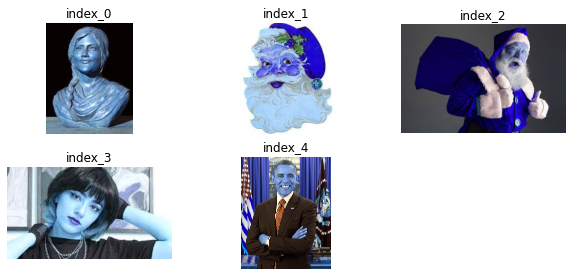

In [13]:
import cv2
from matplotlib import pyplot as plt
  
fig = plt.figure(figsize=(10, 7))
  
rows = 3
columns = 3
  
Image1 = cv2.imread('/content/0.jpg')
Image2 = cv2.imread('/content/1.jpg')
Image3 = cv2.imread('/content/2.jpg')
Image4 = cv2.imread('/content/3.jpg')
Image5 = cv2.imread('/content/4.jpg')
  
fig.add_subplot(rows, columns, 1)
  
plt.imshow(Image1)
plt.axis('off')
plt.title("index_0")
  
fig.add_subplot(rows, columns, 2)
  
plt.imshow(Image2)
plt.axis('off')
plt.title("index_1")
  
fig.add_subplot(rows, columns, 3)
  
plt.imshow(Image3)
plt.axis('off')
plt.title("index_2")
  
fig.add_subplot(rows, columns, 4)
  
plt.imshow(Image4)
plt.axis('off')
plt.title("index_3")

fig.add_subplot(rows, columns, 5)
  
plt.imshow(Image5)
plt.axis('off')
plt.title("index_4")

Testing the best model on new images

In [14]:
import tensorflow as tf
from PIL import Image
import numpy as np
from keras.models import load_model

model = tf.keras.models.load_model('Scenario_22.h5')


img_size = 224  
images = []
for i in range(5):
    img = Image.open(f'/content/{i}.jpg')
    img = img.resize((img_size, img_size))
    img = np.array(img) / 255.0   
    images.append(img)
images = np.array(images)


predictions = model.predict(images)


for i in range(5):
    predicted_class = np.argmax(predictions[i])
    
    if predicted_class <= 0.5:
        label = 'not-a-santa'
    else:
        label = 'santa'
    print(f'Image {i}: predicted {label}')

1/1 [==============================] - 0s 252ms/step
Image 0: predicted not-a-santa
Image 1: predicted not-a-santa
Image 2: predicted not-a-santa
Image 3: predicted not-a-santa
Image 4: predicted not-a-santa


Confustion Matrix for Scenario 22


In [25]:
#confusion_matrix()
model = tf.keras.models.load_model('Scenario_22.h5')

x = np.concatenate((images_S, images_NS), axis=0)
y = np.concatenate((labels_S, labels_NS), axis=0)

X = x/255.0
Y = y

import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = np.round(model.predict(X))

cm = confusion_matrix(Y, y_pred)
print('Confusion matrix:\n', cm)

39/39 [==============================] - 1s 20ms/step
Confusion matrix:
 [[513 102]
 [ 12 603]]


Confustion Matrix for Scenario 23


In [15]:
model = tf.keras.models.load_model('Scenario_23.h5')

x = np.concatenate((images_S, images_NS), axis=0)
y = np.concatenate((labels_S, labels_NS), axis=0)

X = x/255.0
Y = y

import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = np.round(model.predict(X))

cm = confusion_matrix(Y, y_pred)
print('Confusion matrix:\n', cm)

39/39 [==============================] - 1s 24ms/step
Confusion matrix:
 [[493 122]
 [  6 609]]


Confustion Matrix for Scenario 21


In [14]:
model = tf.keras.models.load_model('Scenario_21.h5')

x = np.concatenate((images_S, images_NS), axis=0)
y = np.concatenate((labels_S, labels_NS), axis=0)

X = x/255.0
Y = y

import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = np.round(model.predict(X))

cm = confusion_matrix(Y, y_pred)
print('Confusion matrix:\n', cm)

39/39 [==============================] - 1s 24ms/step
Confusion matrix:
 [[593  22]
 [209 406]]


Confustion Matrix for Scenario 20


In [15]:
model = tf.keras.models.load_model('Scenario_20.h5')

x = np.concatenate((images_S, images_NS), axis=0)
y = np.concatenate((labels_S, labels_NS), axis=0)

X = x/255.0
Y = y

import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = np.round(model.predict(X))

cm = confusion_matrix(Y, y_pred)
print('Confusion matrix:\n', cm)

39/39 [==============================] - 3s 50ms/step
Confusion matrix:
 [[543  72]
 [  4 611]]


Confustion Matrix for Scenario 17


In [16]:
model = tf.keras.models.load_model('Scenario_17.h5')

x = np.concatenate((images_S, images_NS), axis=0)
y = np.concatenate((labels_S, labels_NS), axis=0)

X = x/255.0
Y = y

import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = np.round(model.predict(X))

cm = confusion_matrix(Y, y_pred)
print('Confusion matrix:\n', cm)

39/39 [==============================] - 3s 40ms/step
Confusion matrix:
 [[544  71]
 [  0 615]]


# pre-trained model

In [19]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()

model.add(base_model)

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))



58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
16/16 [==============================] - 20s 854ms/step - loss: 1.0676 - accuracy: 0.6677 - val_loss: 1.0692 - val_accuracy: 0.3089
Epoch 2/10
16/16 [==============================] - 6s 353ms/step - loss: 0.5000 - accuracy: 0.7561 - val_loss: 1.3338 - val_accuracy: 0.3496
Epoch 3/10
16/16 [==============================] - 6s 358ms/step - loss: 0.4667 - accuracy: 0.7673 - val_loss: 0.3965 - val_accuracy: 0.4756
Epoch 4/10
16/16 [==============================] - 6s 353ms/step - loss: 0.2825 - accuracy: 0.8892 - val_loss: 1.1027 - val_accuracy: 0.4268
Epoch 5/10
16/16 [==============================] - 5s 345ms/step - loss: 0.3124 - accuracy: 0.8567 - val_loss: 0.5667 - val_accuracy: 0.4756
Epoch 6/10
16/16 [==============================] - 5s 344ms/step - loss: 0.2600 - accuracy: 0.8872 - val_loss: 1.3595 - val_accuracy: 0.4268
Epoch 7/10
16/16 [==============================] - 5s 349ms/step - loss: 0.1957 -

In [20]:
model.save('VGG16.h5')

In [24]:
model = tf.keras.models.load_model('VGG16.h5')

x = np.concatenate((images_S, images_NS), axis=0)
y = np.concatenate((labels_S, labels_NS), axis=0)

X = x/255.0
Y = y

import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = np.round(model.predict(X))

cm = confusion_matrix(Y, y_pred)
print('Confusion matrix:\n', cm)

39/39 [==============================] - 10s 175ms/step
Confusion matrix:
 [[584  31]
 [ 37 578]]
